In [1]:
# Import libraries
%run ./0_libraries.ipynb
%run ./1_constants.ipynb
%run ./2_functions.ipynb
%run ./3_testcases.ipynb
%run ./4_equations.ipynb

# %run ./6_well_posedness.ipynb
# %run ./7_fourier.ipynb

In [2]:
"""
WELL-POSEDESS MAP
"""
# superficial velocities
j_lvector           = np.linspace (minj_l, maxj_l, num = testpointsj_l)
j_gvector           = np.linspace (minj_g, maxj_g, num = testpointsj_g) #*****MODIFIQUE DE 1.000, 10.000 PARA 1,1

#MAP MATRICES----------------------------------------------------------------------------------------------------
j_lmapwellposedness = np.zeros ((testpointsbeta,testpointsj_l)) #(rows,columns)
var1map              = np.zeros ((testpointsbeta,testpointsj_l)) #(rows,columns)

k = 0
for beta in betavector:
    print (" >>> β =", np.rad2deg (beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gvector: #iterative process for j2
        #print (">>j2 = ", j2)
        i = 0 #for each element of j1vector
        for j_l in j_lvector: #iterative process for j1
            #print (">j1 = ", j1)
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)

            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
           
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            
            m1, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)
                        
            listreal1 = []
            listimag1 = []

            for l1 in range (len (m1)):
                realpart1 = m1 [l1].real                
                imagpart1 = m1 [l1].imag
                
                listimag1.append (imagpart1)
                listreal1.append (realpart1)
            
            if all ([ v == 0 for v in listimag1 ]) :
                i += 1
            else: 
                j_lmapwellposedness [k, j] = j_l
                var1map [k, j] = var1eq
                break
        j += 1
    k += 1

 >>> β = 0.0 deg
 >>> β = 0.25 deg
 >>> β = -5.0 deg


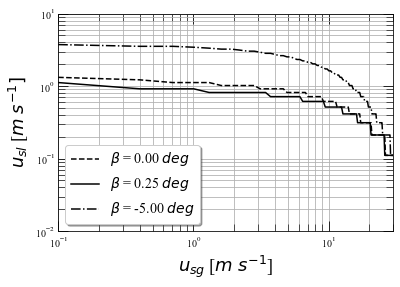

In [3]:
"""
WELL-POSEDNESS MAP: PLOT
"""
x          = j_gvector
fig, ax    = plt.subplots (1)

for i in range(testpointsbeta):
    ax.loglog (x, 
               j_lmapwellposedness [i, :], 
               liststyles [i], 
               color = listcolor [0],
               label =  r'$\beta$' + ' = ' + str ("%.2f" %betavectordeg [i]) + ' $\it{deg}$')

    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')

    # Savitzky-Golay Filter
    #for numero in arange: #scipy.signal.savgol_filter: window size 51, polynomial order 3
    #    ax.loglog (x, scipy.signal.savgol_filter(j1map [numero,:], 91, 3), label = '$beta$' + '='+str("%.2f" %betavectordeg [numero]) + ' deg')

    #plt.title('Well-posedness limit for horizontal and inclined pipes')

#     style.use('ggplot')
    
    plt.ylim ((minj_l, maxj_l))
    plt.xlim ((minj_g, maxj_g))

    #tick_params(labeltop=False, labelright=True)
    plt.grid (True, which = "both")

    plt.rcParams ['figure.figsize'] = mapsize
    leg = ax.legend (loc = 'best', fontsize = 14, shadow = True, frameon = True,);

    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)
    
    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    ax.set_xlabel(r'$u_{sg}$ [$\it{m \; s^{-1}}$]',
                  fontsize = 18)
    ax.set_ylabel(r'$u_{sl}$ [$\it{m \; s^{-1}}]$',
                  fontsize = 18)

    plt.savefig('figures/fig1.pdf',
                optimize = True,
                transparent = True,  
                dpi = 1000)

plt.show ()


In [5]:
"""
CONSTANT VOID FRACTION LINES (alpha = 0.5) for downflow and horizontal
"""
j_gvectorline = np.linspace (minj_g, maxj_g, num = testpointsj_g)
j_llinemap    = np.zeros ((testpointsbeta,testpointsj_l))

k = 0
for beta in betavector:
    print (" >>> β = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gvectorline: #iterative process for j2        
        var1 = 0.5
        j_lline = fsolve (equilibrium2, x0) #Python function    
        j_llinemap [k, j] = j_lline
        j += 1
    k += 1

 >>> β =  0.0 deg
 >>> β =  0.25 deg
 >>> β =  -5.0 deg


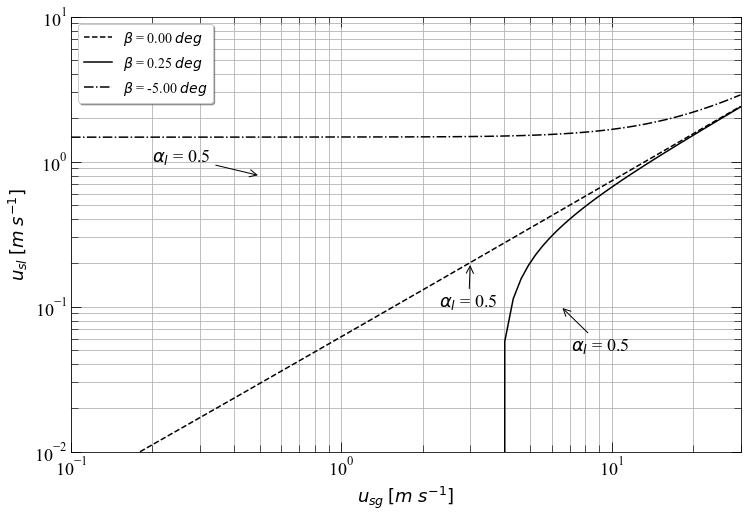

In [6]:
"""
CONSTANT VOID FRACTION LINES (alphal = 0.5)
"""
x = j_gvectorline
fig, ax = plt.subplots (1)

for i in range(testpointsbeta):
    ax.loglog (x,
               j_llinemap [i, :],
               liststyles [i],
               color = listcolor [0],
               label =  r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')

    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')
        
# Savitzky-Golay Filter
#for numero in arange: #scipy.signal.savgol_filter: window size 51, polynomial order 3
#    ax.loglog (x, scipy.signal.savgol_filter(j1map [numero,:], 91, 3), label = '$beta$' + '='+str("%.2f" %betavectordeg [numero]) + ' deg')

#plt.title('Well-posedness limit for horizontal and inclined pipes')

plt.ylim ((minj_l, maxj_l))
plt.xlim ((minj_g, maxj_g))

#tick_params(labeltop=False, labelright=True)
plt.grid (True, which = "both")

plt.rcParams ['figure.figsize'] = [12, 8]
leg = ax.legend (loc = 'best', fontsize = 14, shadow = True, frameon = True);

matplotlib.rc ('xtick', labelsize = 18)     
matplotlib.rc ('ytick', labelsize = 18)

# Annotation for alpha_l
ax.annotate(r'$\alpha_l$ = 0.5 ', 
            xy=(0.5, 0.8), xycoords='data', size=18,
            xytext=(0.2, 1.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate(r'$\alpha_l$ = 0.5 ', 
            xy=(3, 0.2), xycoords='data', size=18,
            xytext=(2.3, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate(r'$\alpha_l$ = 0.5 ', 
            xy=(6.5, 0.1), xycoords='data', size=18,
            xytext=(7.1, 0.05), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
# plt.text(0.3, 0.6, r'$\alpha_l$ = 0.5', fontsize = 18)
# plt.text(2.3, 0.1, r'$\alpha_l$ = 0.5', fontsize = 18)
# plt.text(7.1, 0.05, r'$\alpha_l$ = 0.5', fontsize = 18)

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)

plt.show ()
# plt.savefig('09_comp_TFM_stability/well-posedness_map_2.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')

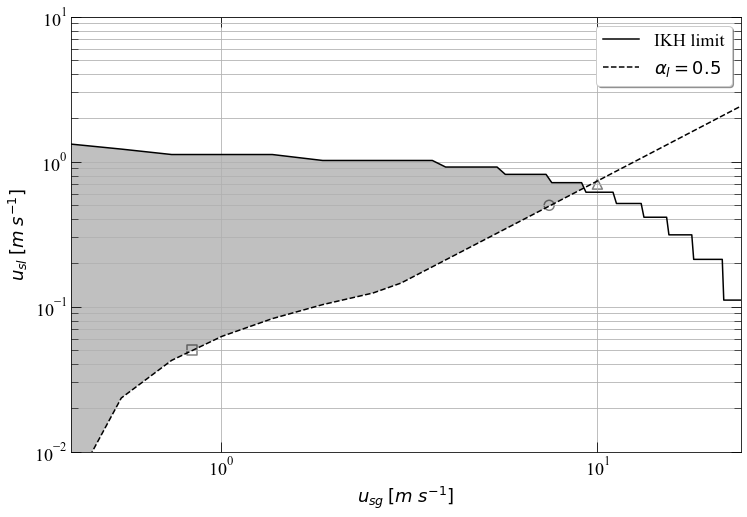

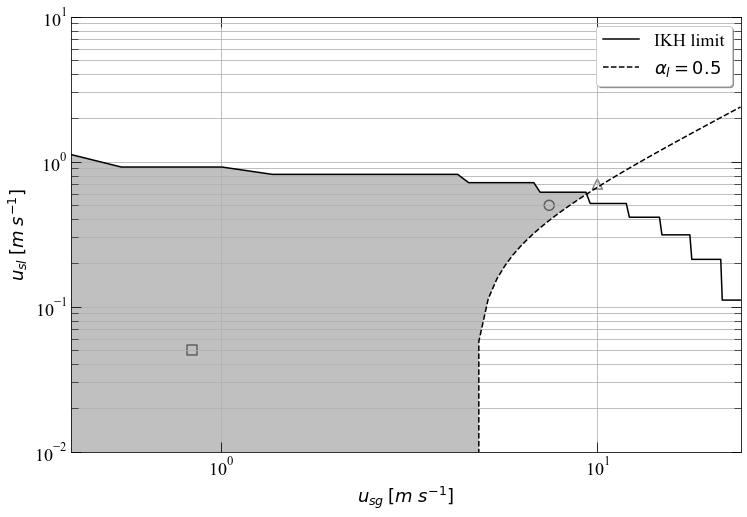

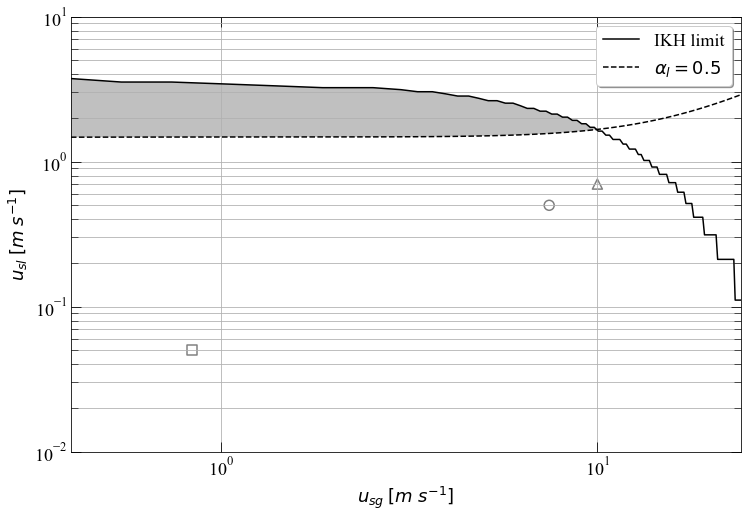

In [7]:
"""
WELL-POSEDNESS MAP: PLOT with constant alpha lines
"""
x = j_gvector

for i in range(testpointsbeta):
#     print("i = ", i)
    fig, ax   = plt.subplots () ###try (3)
    ax.loglog (x, 
               j_lmapwellposedness [i, :],
               liststyles [1], 
               color = listcolor [0],
               label =  'IKH limit')
    ax.loglog (x,
               j_llinemap [i, :],
               liststyles [0], 
               color = listcolor [0],
               label =  r'$\alpha_l = 0.5$ ')
    
    # Fill
    ax.fill_between(x,
                    j_llinemap [i, :],
                    j_lmapwellposedness [i, :],
                    where = j_lmapwellposedness [i, :] >= j_llinemap [i, :],
                    facecolor = 'silver',
                    interpolate = True)    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')
    
    #Scatter for test points
    # ax.plot(j_lcases [i], listmarkers[1], j_gcases [i], listmarkers[3], color = 'black', fillstyle = 'none', markersize = 10, markeredgewidth = 1)
    for i in range (testpointsj_l_cases):
        ax.scatter (j_gcases [i], j_lcases [i], s = area, color = listcolor [4], marker = listmarkers[i], edgecolors = listcolor [0], linewidths = 1.5, alpha = 0.5)
        ax.set_xscale ('symlog')
    
    plt.ylim ((minj_l, maxj_l))
    plt.xlim ((minj_g, maxj_g))

    #tick_params(labeltop=False, labelright=True)
    plt.grid (True, which = "both")
    plt.rcParams ['figure.figsize'] = [12, 8]
    leg = ax.legend (loc = 'best', fontsize = 18, shadow = True);

    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)
    
    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')
    
    ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
    ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
    plt.show ()

#     plt.savefig('09_comp_TFM_stability/well-posedness_map_3_'+ str(i) +'.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')

    i += 1

 >>>  =  0.0 deg
>>j_g =  0.829
>j_l =  0.05
alphal= 0.4971621132437725
eigenvalues =  [ 295.24530881+0.j -291.95157496+0.j   -0.44083294+0.j    0.64552607+0.j]
>j_l =  0.5
alphal= 0.852923884413515
eigenvalues =  [ 3.00020118e+02+0.j -2.88814659e+02+0.j -5.83268614e-02+0.j
  1.29838049e+00+0.j]
>j_l =  0.7
alphal= 0.8816071815043391
eigenvalues =  [ 3.01646650e+02+0.j -2.87748977e+02+0.j  2.46793372e-01+0.j
  1.44777034e+00+0.j]
>>j_g =  6.908
>j_l =  0.05
alphal= 0.12523194378135571
eigenvalues =  [ 3.01350144e+02+0.j -2.85558739e+02+0.j  1.04248930e-01+0.j
  6.96765524e-01+0.j]
>j_l =  0.5
alphal= 0.5025362575435522
eigenvalues =  [ 307.47435704+0.j -279.73181031+0.j    0.68439716+0.j    1.33584063+0.j]
>j_l =  0.7
alphal= 0.5694342810865435
eigenvalues =  [ 309.67816724+0.j -277.63582354+0.j    1.17430529+0.j    1.32994823+0.j]
>>j_g =  10.0
>j_l =  0.05
alphal= 0.09074294757797834
eigenvalues =  [ 3.04443846e+02+0.j -2.82450294e+02+0.j  2.98630272e-01+0.j
  8.05811435e-01+0.j]
>j_

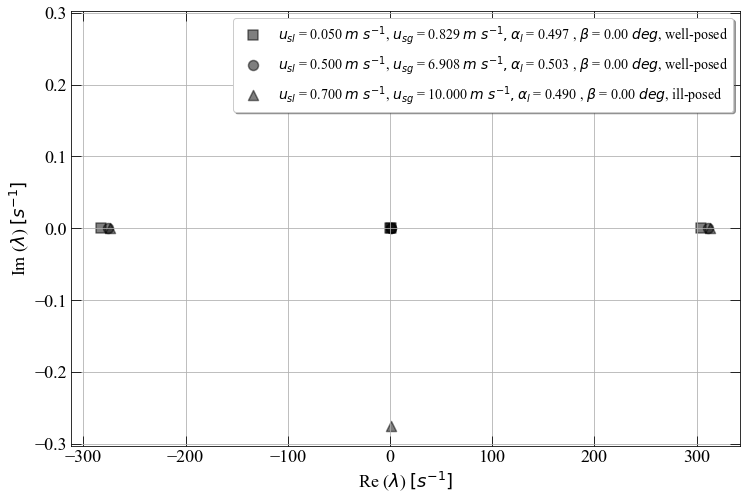

 >>>  =  0.25 deg
>>j_g =  0.829
>j_l =  0.05
alphal= 0.8554508060304546
eigenvalues =  [ 300.13411505+0.j -288.74153171+0.j   -0.54758625+0.j    0.74204385+0.j]
>j_l =  0.5
alphal= 0.8880732711878121
eigenvalues =  [ 3.02125157e+02+0.j -2.87437007e+02+0.j  9.66094489e-02+0.j
  1.15453627e+00+0.j]
>j_l =  0.7
alphal= 0.9011583246333295
eigenvalues =  [ 303.28983989+0.j -286.67523038+0.j    0.48588274+0.j    1.2273647 +0.j]
>>j_g =  6.908
>j_l =  0.05
alphal= 0.2008289701469272
eigenvalues =  [ 3.02114426e+02+0.j -2.84831419e+02+0.j -9.14630781e-02+0.j
  5.94306202e-01+0.j]
>j_l =  0.5
alphal= 0.5396162280384217
eigenvalues =  [ 308.61668339+0.j -278.64539142+0.j    0.71326861+0.j    1.17835418+0.j]
>j_l =  0.7
alphal= 0.5951270681365044
eigenvalues =  [ 310.71747972+0.j         -276.64765842+0.j
    1.20345209+0.26510672j    1.20345209-0.26510672j]
>>j_g =  10.0
>j_l =  0.05
alphal= 0.10687319071791443
eigenvalues =  [ 3.04645595e+02+0.j -2.82255348e+02+0.j  2.03725258e-01+0.j
  7.3495

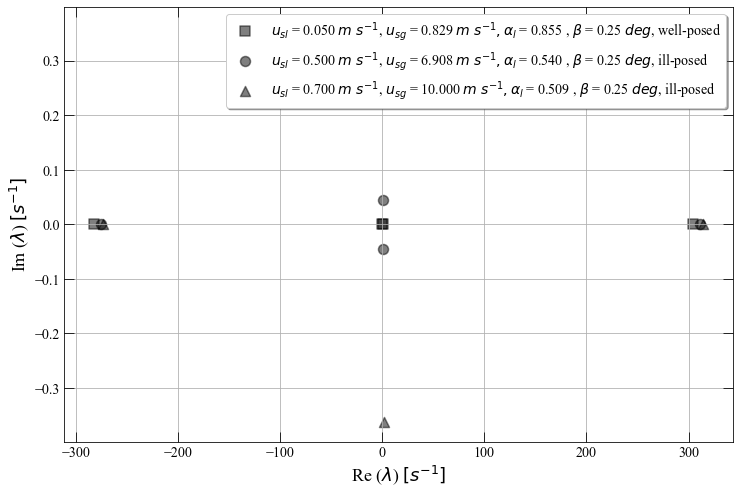

 >>>  =  -5.0 deg
>>j_g =  0.829
>j_l =  0.05
alphal= 0.04490587626519991
eigenvalues =  [ 294.30600235+0.j -292.57002098+0.j    1.32965686+0.j    0.89719638+0.j]
>j_l =  0.5
alphal= 0.22715277459204822
eigenvalues =  [-292.40703915+0.j  294.55312341+0.j    2.58926535+0.j    1.81228793+0.j]
>j_l =  0.7
alphal= 0.2891549883162323
eigenvalues =  [-292.33250004+0.j  294.66612031+0.j    2.84767325+0.j    1.99283587+0.j]
>>j_g =  6.908
>j_l =  0.05
alphal= 0.04347710392642658
eigenvalues =  [ 300.65942557+0.j -286.21608465+0.j    0.94112713+0.j    1.35957568+0.j]
>j_l =  0.5
alphal= 0.2228769653511413
eigenvalues =  [ 302.36592345+0.j -284.59195926+0.j    1.87896427+0.j    2.61224659+0.j]
>j_l =  0.7
alphal= 0.2832223374329644
eigenvalues =  [ 303.13172929+0.j -283.86315714+0.j    2.07886367+0.j    2.87083136+0.j]
>>j_g =  10.0
>j_l =  0.05
alphal= 0.04180199685764239
eigenvalues =  [ 303.87324315+0.j -283.00166862+0.j    0.99617495+0.j    1.39699344+0.j]
>j_l =  0.5
alphal= 0.2175798992638

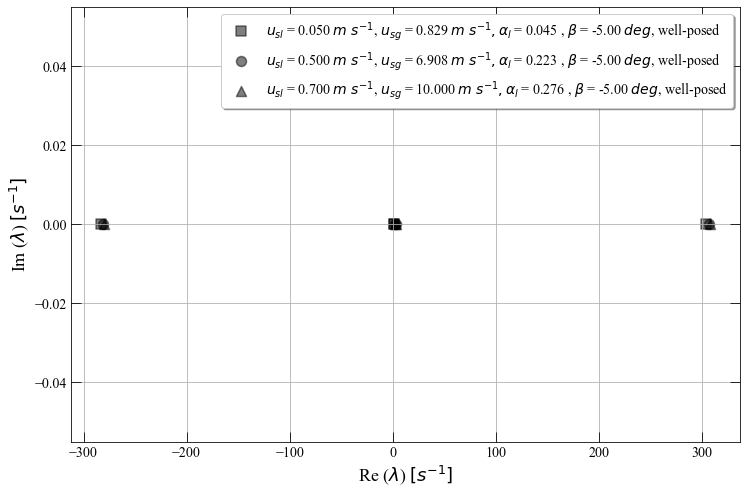

In [8]:
"""
EIGENSPECTRA FOR STRATIFIED SMOOTH AND ILL-POSED REGION
Array with 3 points
"""
#MAP 
var1mapeig = np.zeros ((testpointsj_l_cases, testpointsj_g_cases))
maprealeig = [[ ] for i in range(testpointsj_l_cases)]
mapimageig = [[ ] for i in range(testpointsj_l_cases)]
mapwpeig   = [[ ] for i in range(testpointsj_l_cases)]
    
k = 0
for beta in betavector:
    print (" >>>  = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gcases: #iterative process for j2
        print (">>j_g = ", j_g)
        
        i = 0 #for each element of j1vector
        
        listj_l_imageig = [[] for i in range(6)]
        listj_l_realeig = [[] for i in range(6)]
        
        for j_l in j_lcases: #iterative process for j1
            print (">j_l = ", j_l)
            
            # finding the solution with fsolve
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            print("alphal=", var1eq)
            var1mapeig[i,j] = var1eq
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            
            Aevaleig = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Bevaleig = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            
            meig1, _ = eig (Bevaleig, b = Aevaleig, overwrite_a = True, overwrite_b = True, check_finite = True)
            print("eigenvalues = ", meig1)

            listrealeig1 = []
            listimageig1 = []
            
            for l1eig in range (len (meig1)):
                realparteig1 = meig1 [l1eig].real                
                imagparteig1 = meig1 [l1eig].imag
                
                listimageig1.append (imagparteig1)
                listrealeig1.append (realparteig1)
            
            mapimageig[i] = listimageig1
            maprealeig[i] = listrealeig1

            if all ([ v == 0 for v in listimageig1]) :
                condition = 'well-posed'
            else: 
                condition = 'ill-posed'
            
            mapwpeig[i] = condition
            i += 1      
        j += 1
        
    # Plot eigenspectra
    fig, ax = plt.subplots ()

    for ii in range(testpointsj_l_cases):
        ax.scatter (maprealeig [ii],
                    mapimageig [ii], 
                    s = area,
                    marker = listmarkers[ii],
                    color = listcolor [0], 
                    edgecolors = listcolor [0],
                    linewidths = 1.5,
                    alpha = 0.5,
                    label = '$u_{sl}$'+ ' = ' + str("%.3f" %j_lcases [ii])+ ' $\it{m \; s^{-1}}$' + ', ' + '$u_{sg}$' + ' = ' + str("%.3f" %j_gcases[ii]) + ' $\it{m \; s^{-1}}$' + '$ , $' + r'$\alpha_l$' + ' = ' + str("%.3f" %var1mapeig [ii, ii]) + ' ' + ', ' + r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [k]) + ' $\it{deg}$' + ', ' + mapwpeig[ii])

        # ax.set_xscale ('symlog')
#         ax.set_yscale ('symlog')
        
        # minor ticks.
#         ax.xaxis.set_major_locator(MultipleLocator(1))
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        
#         ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        # For the minor ticks, use no labels; default NullFormatter.
#         ax.xaxis.set_minor_locator(MultipleLocator(0.2))
#         ax.yaxis.set_minor_locator(MultipleLocator(0.2))
        ax.xaxis.set_minor_locator(MultipleLocator(100))

        plt.rcParams ['figure.figsize'] = [12, 8]
        leg1 = ax.legend (loc = 'best', frameon = True, fontsize = 14, shadow = True);
        plt.grid (True, which = "both")
        
        matplotlib.rc ('xtick', labelsize = 14)     
        matplotlib.rc ('ytick', labelsize = 14)

        # plt.ylim (( - 1  , 1))
        # plt.xlim (( - 1e3, 1e3))
        #tick_params(labeltop=False, labelright=True)
        #plt.savefig('well-posedness_map_hilly-terrain_vkh.jpg')
        
        ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

        ax.set_xlabel(r'Re ($\lambda$) $[\it{s^{-1}}]$', fontsize = 18)
        ax.set_ylabel(r'Im ($\lambda$) $[\it{s^{-1}}]$', fontsize = 18)

#         plt.savefig('09_comp_TFM_stability/well-posedness_map_4_'+ str(k) +'.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')
    plt.show ()
    
    k += 1

In [9]:
# End of well-posedness analysis

In [10]:
"""
Two fluid model
compressible
differential equation system
Fourier analysis
"""
j_lvector       = np.linspace (minj_l, maxj_l, num = testpointsj_l)
j_gvector       = np.linspace (minj_g, maxj_g, num = testpointsj_g)
j_lmapstability = np.zeros ((testpointsbeta,testpointsj_l)) #(rows,columns)

k = 0
for beta in betavector:
    print ("  >>> β = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gvector: #iterative process for j2
        i = 0 #for each element of j1vector
        for j_l in j_lvector: #iterative process for j1
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            ref = np.array([var1_0, var2_0, var3_0, var4_0])
            
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))

            Acomplex   = Aeval.dot (1j)
            Bcomplex   = Beval.dot (1j)
            Ccomplex   = Ceval.dot (1j)
            
            #criterion for well-posedness
            wavenumber = 2*pi
            m2, _ = eig ( (-wavenumber*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 
            
            listreal2   = []
            listimag2   = []
            
            for l2 in range (len (m2)):
                realpart = m2 [l2].real                
                imagpart = m2 [l2].imag
                
                listimag2.append (imagpart)
                listreal2.append (realpart)
            
            if all ([ v > 0 for v in listimag2]) :
                i += 1
            else: 
                j_lmapstability [k, j] = j_l
                break
        j += 1
    k += 1

  >>> β =  0.0 deg
  >>> β =  0.25 deg
  >>> β =  -5.0 deg


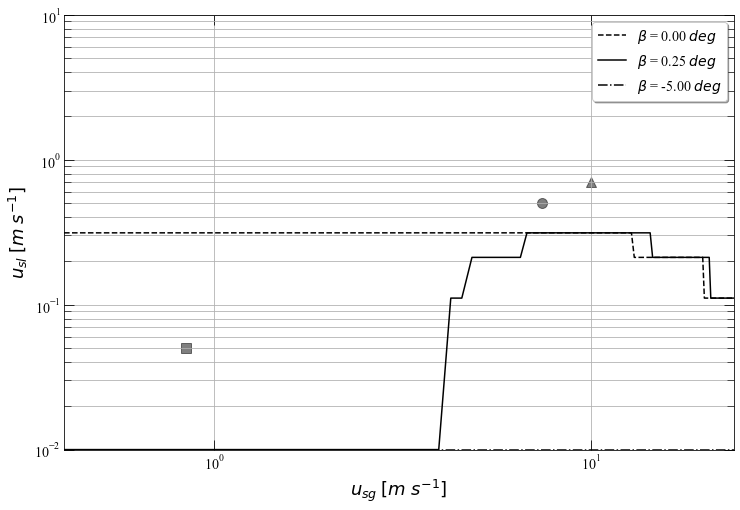

In [11]:
x = j_gvector
fig, ax = plt.subplots ()

for i in range(testpointsbeta):
    ax.loglog (x,
               j_lmapstability [i, :],
               liststyles [i],
               color = 'k' ,
               label = r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')

for i in range (testpointsj_l_cases):
    ax.scatter (j_gcases [i], 
                j_lcases [i],
                s = area, 
                color = listcolor [0], 
                marker = listmarkers[i], 
                edgecolors = listcolor [0], 
                linewidths = 1, 
                alpha = 0.5)
    ax.set_xscale ('symlog')

    #ax.set_xscale ('symlog')
    #ax.set_yscale ('symlog')
    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')

# Savitzky-Golay Filter
# for i in range (testpointsbeta): #scipy.signal.savgol_filter: window size 51, polynomial order 3  *******63, 1
#     ax.loglog (x, scipy.signal.savgol_filter(j1mapstability [i,:], 93, 1), liststyles [i], color = 'k', label = '$beta$' + ' = '+str("%.2f" %betavectordeg [i]) + ' deg')

#plt.title('Well-posedness limit for horizontal and inclined pipes')

plt.ylim ((minj_l, maxj_l))
plt.xlim ((minj_g, maxj_g))

#tick_params(labeltop=False, labelright=True)
plt.grid (True, which = "both")
plt.rcParams ['figure.figsize'] = [12, 8]
leg = ax.legend (loc = 'best', fontsize = 14, shadow = True);

matplotlib.rc ('xtick', labelsize = 18)     
matplotlib.rc ('ytick', labelsize = 18)

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)

plt.show ()
# plt.savefig('09_comp_TFM_stability/stability_map_1.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')

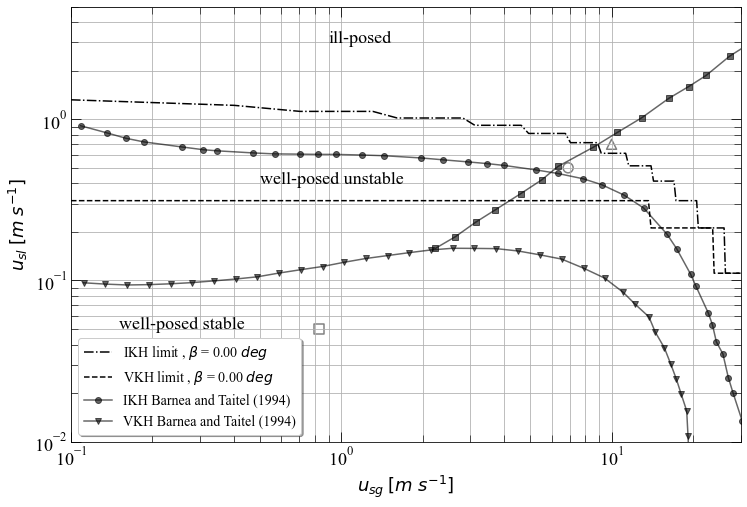

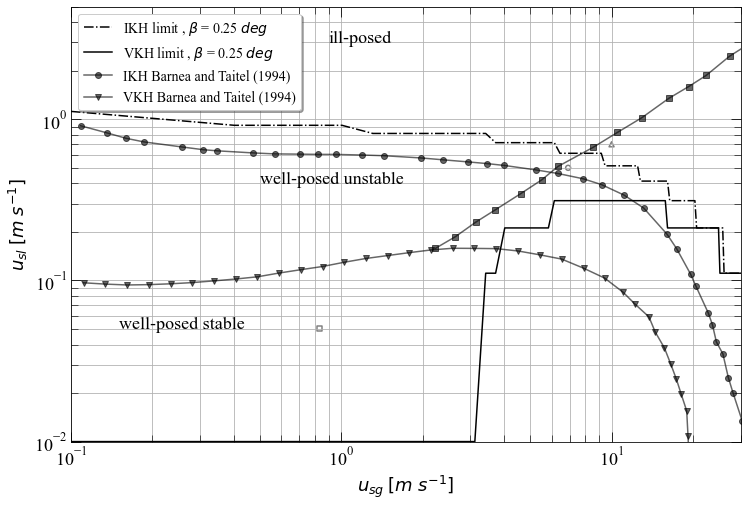

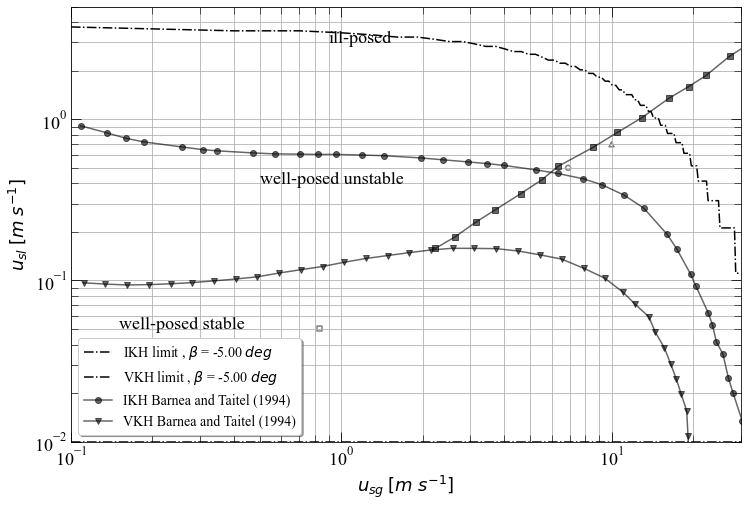

In [12]:
"""
Bi-Global STABILITY ANALYSIS FOR A CONSTANT WAVELENGTH:
"""
x = j_gvector

i = 0
for i in range(testpointsbeta):
    fig, ax    = plt.subplots ()
    criteria   = ["VKH limit", "IKH limit"]
    
    # neutral stability
    ax.loglog (x,
               j_lmapwellposedness [i, :],
               liststyles [2],
               color = listcolor [0],
               label = criteria [1] + ' , ' + r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')
    ax.loglog (x, j_lmapstability [i, :], liststyles [i], color = 'k', label = criteria [0] + ' , ' + r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')
    
    # Savitzky-Golay Filter ****83, 1
    # ax.loglog (x,
    #            scipy.signal.savgol_filter(j_lmapstability [i,:], 93, 1), #93, 1
    #            liststyles [0], color = listcolor [0],
    #            label = criteria [0] + ' , ' + '$β$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' [°]')
    
    # # line of constant alpha
    # ax.loglog (x,
    #            j_llinemap [i, :],
    #            liststyles [1],
    #            color = listcolor [0],
    #            label =  r'$\alpha_l$ = 0.5 [-]')
  # Fill
    # ax.fill_between(x,
    #                 scipy.signal.savgol_filter(j_lmapstability [i,:], 9, 1),
    #                 j_lmapwellposedness [i, :],
    #                 where = j_lmapwellposedness [i, :] >= scipy.signal.savgol_filter(j_lmapstability [i,:], 113, 1),
    #                 facecolor = 'silver',
    #                 interpolate = True)    
    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s') 
    
    #Scatter
#     ax.plot(j_gtest2 [i, :], j_ltest2 [i, :], 's', color = 'black')

    for i in range (testpointsj_l_cases):
        ax.scatter (j_gcases [i], j_lcases [i], s = area, color = listcolor [4], marker = listmarkers[i], edgecolors = listcolor [0], linewidths = 1.5, alpha = 0.5)
        ax.set_xscale ('symlog')

    plt.ylim ((minj_l, maxj_l))
    plt.xlim ((minj_g, maxj_g))

    #plt.title('Well-posedness limit for horizontal and inclined pipes')
    #tick_params(labeltop=False, labelright=True)
    plt.grid (True, which = "both")
    plt.rcParams ['figure.figsize'] = [12, 8]
    leg = ax.legend (loc = 'upper right', frameon = True, fontsize = 14, shadow = True);

    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)

    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
    ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)

    #>>>>>>>>>>VALIDATION (JUST ACTIVATE WHEN PLOTING VALIDATION FOR HORIZONTAL)
    minj1            = 1e-2 # epstest
    maxj1            = 5

    minj2            = 1e-1 # epstest
    maxj2            = 30

    # >>HORIZONTAL SANDERSE (D=0.078m)
    # x1,y1 = np.loadtxt('Sanderse2017_horizontal/well-posedness_sanderse.csv',
    #              unpack = True, 
    #              delimiter = ',')
    # x2,y2 = np.loadtxt('Sanderse2017_horizontal/globalstability_sanderse.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # # fig, ax = plt.subplots()

    # ax.loglog(x1,y1, 'k-', label = 'IKH Sanderse, Smith and Hendrix (2017)')
    # ax.loglog(x2,y2, 'k:', label = 'VKH Sanderse, Smith and Hendrix (2017)')

    # plt.ylim ((minj1, maxj1))
    # plt.xlim ((minj2, maxj2))
    # plt.grid (True, which = "both")
    # leg = ax.legend (loc = 'upper right',
    #                 fontsize = 14);
    # plt.rcParams ['figure.figsize'] = [12, 8]

    # matplotlib.rc ('xtick',
    #             labelsize = 18)     
    # matplotlib.rc ('ytick',
    #             labelsize = 18)
    # leg1  = ax.legend (loc = 'upper right',
    #                 shadow = True, 
    #                 frameon = True, 
    #                 fontsize = 14);

    # ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    # ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    # ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    # ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    # ax.set_xlabel(r'$u_{sg}$ [m/s]',
    #             fontsize = 18)
    # ax.set_ylabel(r'$u_{sl}$ [m/s]',
    #             fontsize = 18)

    #================================
    # >># Plot Barnea Shoham Taitel (1981) for validation 
    # https://automeris.io/WebPlotDigitizer/tutorial.html
    # horizontal pipe d = 0.051

    x1,y1 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_IKH.csv',
                    unpack = True, 
                    delimiter = ',')
    x2,y2 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_VKH.csv',
                    unpack = True, 
                    delimiter = ',')
    x3,y3 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/shoham1982_0deg.csv',
                    unpack = True, 
                    delimiter = ',')
    x4,y4 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_hlD.csv',
                    unpack = True, 
                    delimiter = ',')

    # fig, ax = plt.subplots(1)

    area = 25
    alphaplot = 0.6
    ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
    ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
    # ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
    # ax.loglog(x3,y3, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
    ax.loglog(x4,y4, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

    plt.ylim ((minj1, maxj1))
    plt.xlim ((minj2, maxj2))
    plt.grid (True, which = "both")
    leg = ax.legend (loc = 'best',
                    fontsize = 14);
    plt.rcParams ['figure.figsize'] = [12, 8]

    matplotlib.rc ('xtick',
                labelsize = 18)     
    matplotlib.rc ('ytick',
                labelsize = 18)

    handles,labels = ax.get_legend_handles_labels()

    handles = [handles[0], handles[1], handles[2], handles[3]]
    labels = [labels[0], labels[1], labels[2], labels[3]]

    leg1  = ax.legend (handles,
                    labels,
                    loc = 'best',
                    shadow = True, 
                    frameon = True, 
                    fontsize = 14);

    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$', 
                fontsize = 18, 
                fontdict = font)
    ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
                fontdict = font,
                fontsize = 18)

    plt.text(0.15, 0.05, 'well-posed stable', size = 18)
    plt.text(0.5, 0.4, 'well-posed unstable', size = 18)
    plt.text(0.9, 3, 'ill-posed', size = 18)


    # =================
    # 0.25inc

    # x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_IKH.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_VKH.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/shoham1982_025deg.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x4,y4 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_hlD.csv',
    #                 unpack = True, 
    #                 delimiter = ',')

    # # fig, ax = plt.subplots(1)

    # area = 25
    # alphaplot = 0.6
    # ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
    # ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
    # # ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
    # # ax.loglog(x3,y3, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
    # # ax.loglog(x4,y4, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

    # plt.ylim ((minj1, maxj1))
    # plt.xlim ((minj2, maxj2))
    # plt.grid (True, which = "both")
    # leg = ax.legend (loc = 'best',
    #                 fontsize = 14);
    # plt.rcParams ['figure.figsize'] = [12, 8]

    # matplotlib.rc ('xtick',
    #             labelsize = 18)     
    # matplotlib.rc ('ytick',
    #             labelsize = 18)

    # handles,labels = ax.get_legend_handles_labels()

    # handles = [handles[0], handles[1], handles[2], handles[3]]
    # labels = [labels[0], labels[1], labels[2], labels[3]]

    # leg1  = ax.legend (handles,
    #                 labels,
    #                 loc = 'best',
    #                 shadow = True, 
    #                 frameon = True, 
    #                 fontsize = 14);

    # ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    # ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    # ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    # ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    # ax.set_xlabel(r'$u_{sg}$ [m/s]', 
    #             fontsize = 18, 
    #             fontdict = font)
    # ax.set_ylabel(r'$u_{sl}$ [m/s]',
    #             fontdict = font,
    #             fontsize = 18)

    # plt.text(0.3, 0.05, 'well-posed stable', size = 18)
    # plt.text(5.0, 0.02, 'well-posed unstable', size = 18)
    # plt.text(1.1, 2, 'ill-posed', size = 18)

    # =================
    # -5inc

    # x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994_-5deg_IKH.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # # x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_VKH.csv',
    # #                  unpack = True, 
    # #                  delimiter = ',')
    # x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/shoham1982_-5deg.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994_-5deg_hlD.csv',
    #                 unpack = True, 
    #                 delimiter = ',')

    # # fig, ax = plt.subplots(1)

    # area = 25
    # alphaplot = 0.6
    # ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
    # # ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
    # # ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
    # ax.loglog(x2,y2, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
    # ax.loglog(x3,y3, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

    # plt.ylim ((minj1, maxj1))
    # plt.xlim ((minj2, maxj2))
    # plt.grid (True, which = "both")
    # leg = ax.legend (loc = 'best',
    #                 fontsize = 14);
    # plt.rcParams ['figure.figsize'] = [12, 8]

    # matplotlib.rc ('xtick',
    #             labelsize = 18)     
    # matplotlib.rc ('ytick',
    #             labelsize = 18)

    # handles,labels = ax.get_legend_handles_labels()

    # handles = [handles[0], handles[1], handles[2]]
    # labels = [labels[0], labels[1], labels[2]]

    # leg1  = ax.legend (handles,
    #                 labels,
    #                 loc = 'best',
    #                 shadow = True, 
    #                 frameon = True, 
    #                 fontsize = 14);

    # ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    # ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    # ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    # ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    # ax.set_xlabel(r'$u_{sg}$ [m/s]', 
    #             fontsize = 18, 
    #             fontdict = font)
    # ax.set_ylabel(r'$u_{sl}$ [m/s]',
    #             fontdict = font,
    #             fontsize = 18)

    # plt.text(3.0, 0.012, 'well-posed stable', size = 18)
    # plt.text(0.3, 0.5, 'well-posed unstable', size = 18)
    # plt.text(1.5, 3, 'ill-posed', size = 18)





#     plt.show ()
#     plt.savefig('09_comp_TFM_stability/stability_map_2_'+ str(i) +'.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')

    i += 1

 >>>  =  0.0 deg
>>j_g =  0.829
>j_l =  0.05
var1eq =  0.4971621132437725
imaginary angular frequencies [7.66286693e+00 6.97872328e+00 6.51906903e-03 1.26757219e-01]
real angular frequencies [ 1855.06637811 -1834.3712475     -2.76971293     4.05584738]
VKH stable
unstable mode 0
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
eigenvectors 0
>j_l =  0.5
var1eq =  0.852923884413515
imaginary angular frequencies [26.0647205  23.71549533  1.28478836 -0.85474978]
real angular frequencies [ 1.88490988e+03 -1.81450407e+03 -4.92438869e-01  8.28408621e+00]
VKH unstable
unstable mode [-0.85474978]
imaginary part [[[ 0.         -0.85474978  0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0. 

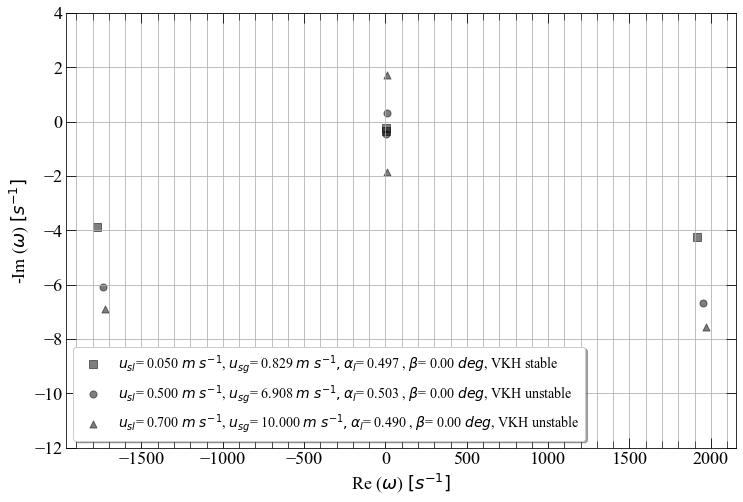

 >>>  =  0.25 deg
>>j_g =  0.829
>j_l =  0.05
var1eq =  0.8554508060304546
imaginary angular frequencies [26.51860284 24.12480747  1.50914825 -1.06583346]
real angular frequencies [ 1885.62006601 -1814.03848052    -3.63334719     4.85528713]
VKH unstable
unstable mode [-1.06583346]
imaginary part [[[ 0.         -0.85474978 -1.90180674]
  [ 0.         -0.21563085 -0.94375164]
  [ 0.         -0.31334146 -1.73101978]]

 [[-1.06583346  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]]
real part [[[0.         8.28408621 9.68739873]
  [0.         8.41160192 8.98692628]
  [0.         8.75659797 9.5937882 ]]

 [[4.85528713 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0

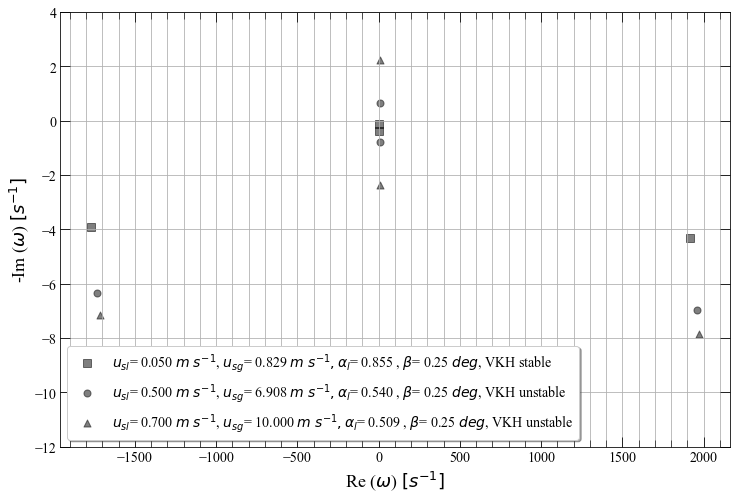

 >>>  =  -5.0 deg
>>j_g =  0.829
>j_l =  0.05
var1eq =  0.04490587626519991
imaginary angular frequencies [ 4.03707805  3.67985091  1.9515597  -0.76146019]
real angular frequencies [ 1849.17507762 -1838.26758934     5.17052279     8.82121312]
VKH unstable
unstable mode [-0.76146019]
imaginary part [[[ 0.         -0.85474978 -1.90180674]
  [ 0.         -0.21563085 -0.94375164]
  [ 0.         -0.31334146 -1.73101978]]

 [[-1.06583346 -2.43594149 -3.46709762]
  [ 0.         -0.4067347  -1.75615145]
  [ 0.         -0.6478719  -2.24446399]]

 [[-0.76146019  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]]
real part [[[0.         8.28408621 9.68739873]
  [0.         8.41160192 8.98692628]
  [0.         8.75659797 9.5937882 ]]

 [[4.85528713 8.25199403 9.90992865]
  [0.         7.47682391 8.29805061]
  [0.         7.78311684 9.17878357]]

 [[8.82121312 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         

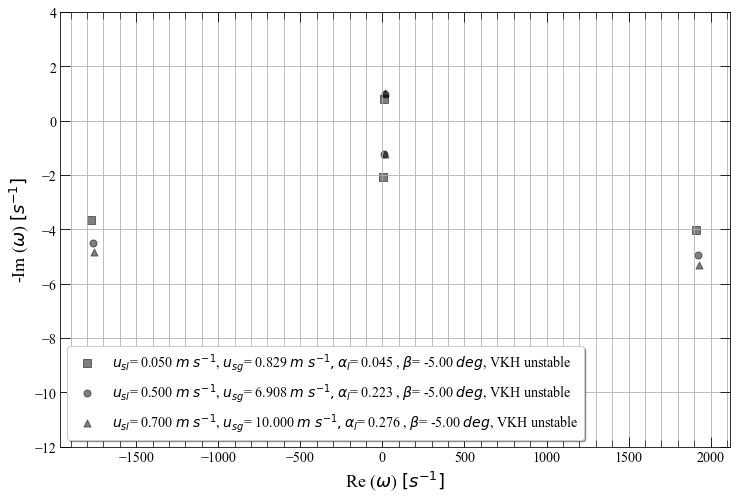

In [13]:
"""
EIGENSPECTRA FOR STRATIFIED SMOOTH AND ILL-POSED REGION
"""
var2mapeig = np.zeros ((testpointsj_l_cases, testpointsj_g_cases))
map2realeig = [[ ] for i in range(testpointsj_l_cases)]
map2imageig = [[ ] for i in range(testpointsj_l_cases)]

map2wpeig   = [[ ] for i in range(testpointsj_l_cases)]
# map3wpeig   = [[ ] for i in range(testpointsj_l_cases)]

ang_freq_imag = np.zeros ((testpointsbeta,testpointsj_l_cases, testpointsj_g_cases))
ang_freq_real = np.zeros ((testpointsbeta,testpointsj_l_cases, testpointsj_g_cases))

eig_vect = ThreeD(testpointsbeta,testpointsj_l_cases, testpointsj_g_cases)

k = 0
for beta in betavector:
    print (" >>>  = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gcases: #iterative process for j2
        print (">>j_g = ", j_g)
        i = 0 #for each element of j1vector
        
        # listj_l_imageig = [[] for i in range(6)] ######nao usado
        # listj_l_realeig = [[] for i in range(6)] ######nao usado
        
        for j_l in j_lcases: #iterative process for j1
            print (">j_l = ", j_l)
            
            # finding the solution with fsolve
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            print("var1eq = ", var1eq)
            var2mapeig [i,j] = var1eq
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))
            
            Acomplex   = Aeval.dot (1j)
            Bcomplex   = Beval.dot (1j)

            wavenumber = 2*pi
            meig2, v2eig = eig ( (-wavenumber*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 

            listrealeig2 = []
            listimageig2 = []
            
            printeigenvectors = []

            for l in range (len (meig2)):
                realpart = meig2 [l].real                
                imagpart = meig2 [l].imag
                
                listimageig2.append (imagpart)
                listrealeig2.append (realpart)
            
            map2imageig[i] = np.array(listimageig2)
            map2realeig[i] = np.array(listrealeig2)

            if all ([ v > 0 for v in listimageig2]) :
                condition = 'VKH stable'
            else:
                # var2mapeig [k, j] = j_l
                condition = 'VKH unstable'

            map2wpeig[i] = condition

            print("imaginary angular frequencies", map2imageig[i])
            print("real angular frequencies", map2realeig[i])

            local1 = np.where(map2imageig[i] < 0)
            
            if any ([ vv < 0 for vv in map2imageig[i]]) :
                print("VKH unstable")
                print("unstable mode", map2imageig[i][local1])
                ang_freq_imag [k, j, i] = map2imageig[i][local1]
                print("imaginary part", ang_freq_imag)
                ang_freq_real [k, j, i] = map2realeig[i][local1]
                print("real part", ang_freq_real)
                print("eigenvectors", v2eig[local1][0])
                eig_vect [k][j][i] = v2eig[local1][0]
            else: 
                print("VKH stable")
                print("unstable mode", 0)
                ang_freq_imag [k, j, i] = 0
                print(ang_freq_imag)
                print("eigenvectors", 0)
                eig_vect [k][j][i] = 0
        
            i += 1      
        j += 1

        
    # Plot eigenspectra
    fig, ax = plt.subplots ()

    print("var2mapeig =", var2mapeig)
    for jj in range(testpointsj_l_cases):
        ax.scatter (map2realeig [jj],
                    -map2imageig [jj], 
                    s = area*2,
                    marker = listmarkers[jj],
                    color = listcolor [0], 
                    edgecolors = listcolor [0],
                    linewidths = 1,
                    alpha = 0.5,
                    label = '$u_{sl}$'+ '= ' + str("%.3f" %j_lcases [jj])+ ' $\it{m \; s^{-1}}$' + ', ' + '$u_{sg}$' + '= ' + str("%.3f" %j_gcases[jj]) + ' $\it{m \; s^{-1}}$' + '$ , $' + r'$\alpha_l$' + '= ' + str("%.3f" %var2mapeig [jj, jj]) + ' ' + ', ' + r'$\beta$' + '= ' + str("%.2f" %betavectordeg [k]) + ' $\it{deg}$' + ', ' + map2wpeig[jj])

        # ax.set_xscale ('symlog')
        ax.xaxis.set_minor_locator(MultipleLocator(100))

        plt.rcParams ['figure.figsize'] = [12, 8]
        leg1 = ax.legend (loc = 'lower', frameon = True, fontsize = 14, shadow = True);
        plt.grid (True, which = "both")
        
        matplotlib.rc ('xtick', labelsize = 14)     
        matplotlib.rc ('ytick', labelsize = 14)

        plt.ylim ( -12, 4)
        # plt.xlim (( -1e3, 1e3))
        
        ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

        ax.set_xlabel(r'Re ($\omega$) $[\it{s^{-1}}]$', fontsize = 18)
        ax.set_ylabel(r'-Im ($\omega$) $[\it{s^{-1}}]$', fontsize = 18)

#         plt.savefig('09_comp_TFM_stability/well-posedness_map_4_'+ str(k) +'.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')
    plt.show ()
    
    k += 1

In [14]:
# End of Fourier analysis. table Plot 3d de como se reduz a area de roll-waves. 
# print(ang_freq_imag[0,0,0])
# print(eig_vect[0][0][0])

  >>>> β =  0.0 deg


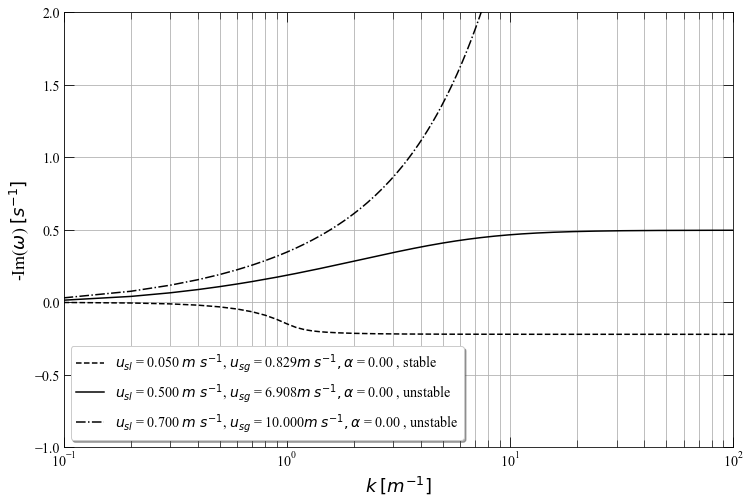

  >>>> β =  0.25 deg


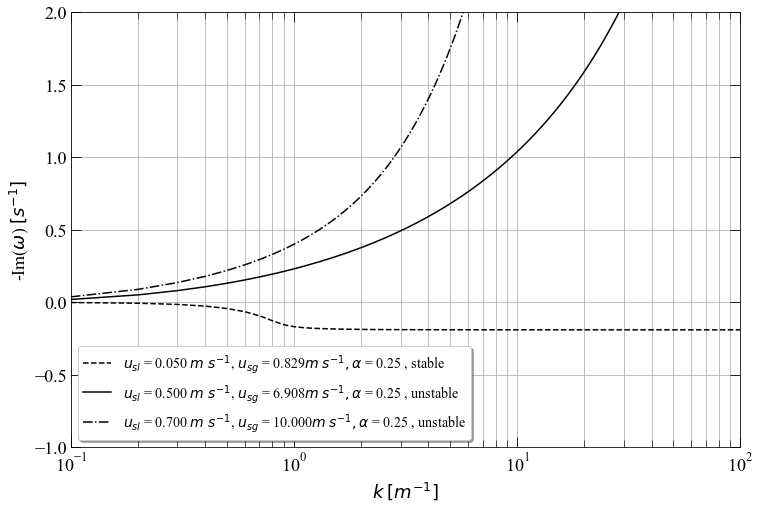

  >>>> β =  -5.0 deg


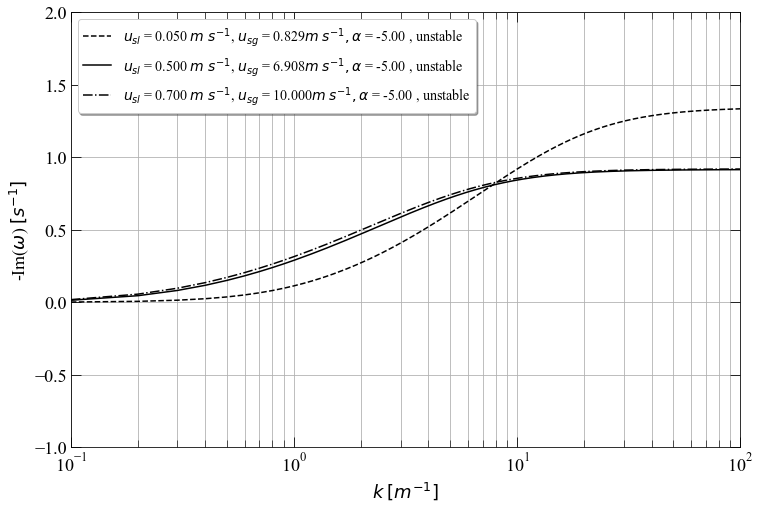

In [15]:
"""
Two fluid model
compressible
differential equation system
Dispersion analysis
"""
lambdavector = np.linspace (minlambda, maxlambda, num = testpointsdispersion)
wavenumbervector = np.linspace (1e-1, 1e2, num = testpointsdispersion)

j_lmapstability = np.zeros ((testpointsbeta,testpointsj_l_cases)) #(rows,columns)

#print("first j1map=", j1map)
k = 0
for beta in betavector:
    print ("  >>>> β = ", np.rad2deg(beta), "deg")
    imagmap = np.zeros ((testpointsj_l_cases, testpointsdispersion)) #(rows,columns)
    mapwp   = [[ ] for i in range (testpointsj_l_cases)]
    
    j = 0 #for each element of j2vector
    for j_g in j_gcases: #iterative process for j2        
        i = 0 #for each element of j1vector
        for j_l in j_lcases: #iterative process for j1
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            ref = np.array([var1_0, var2_0, var3_0, var4_0])
            
            # phi=[alpha2, u2, u1, p]ˆT
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))

            Acomplex = Aeval.dot (1j)
            Bcomplex = Beval.dot (1j)
                        
            #criterion for well-posedness
            h = 0
            for wavenumber in wavenumbervector:
                # wavelength = 2*pi/wavenumber
                m, _ = eig ( (-wavenumber*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 

                listreal   = []
                listimag   = [] 

                for l in range (len (m)):
                    #print("l =", l)
                    realpart = m [l].real                
                    imagpart = m [l].imag

                    listimag.append (imagpart)
                    listreal.append (realpart)

                if any ([ v < 0 for v in listimag]) :
                    condition      = 'unstable'
                    imagmap [i, h] = min ((np.asarray (listimag)))
                    mapwp[i]       = condition
                else: 
                    condition      = 'stable'
                    imagmap [i, h] = min ( (np.asarray (listimag)))
                    mapwp[i]       = condition
                h +=1
            i += 1 
        j += 1

    # Plot of eigenspectra
    fig, ax = plt.subplots ()
    for jj in range(testpointsj_l_cases):
        ax.plot (wavenumbervector,
                 -imagmap [jj],
                 liststyles [jj],
                 color = listcolor [0],
                 alpha = 1,
                 label = '$u_{sl}$' + ' = ' + str("%.3f" %j_lcases [jj]) + ' $\it{m \; s^{-1}}$' + ', ' + '$u_{sg}$' + ' = ' + str("%.3f" %j_gcases[jj]) + '$\it{m \; s^{-1}}$' + '$ , $' + r'$\alpha$' + ' = ' + str("%.2f" %betavectordeg [k]) + '' + ' , ' + mapwp[jj])
        ax.set_xscale ('log')
        
        plt.rcParams ['figure.figsize'] = [12, 8]
        leg1 = ax.legend (loc = 'best', frameon = True, fontsize = 14, shadow = True);
        plt.grid (True, which = "both")
        plt.ylim (-1, 2)
        plt.xlim (1e-1, 100)
        matplotlib.rc ('xtick', labelsize = 18)     
        matplotlib.rc ('ytick', labelsize = 18)
        
        ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')
        
        ax.set_xlabel('$\it{k}$ $[\it{m^{-1}}]$',
            fontsize = 18)
        ax.set_ylabel(r'-Im($\omega$) $[\it{s^{-1}}]$',
            fontsize = 18)

        # plt.savefig('09_comp_TFM_stability/fourier_1_'+ str(k) +'.png',
        #     ppi = 1200,
        #     transparent = True,
        #     bbox_inches = 'tight')
    
    plt.axvline(D, 
                inf_omega, 
                sup_omega, 
                label='pyplot vertical line', 
                color = listcolor [0])
    plt.show ()
    
    k += 1

acoustic1 wave
eigenvector = 1e-06


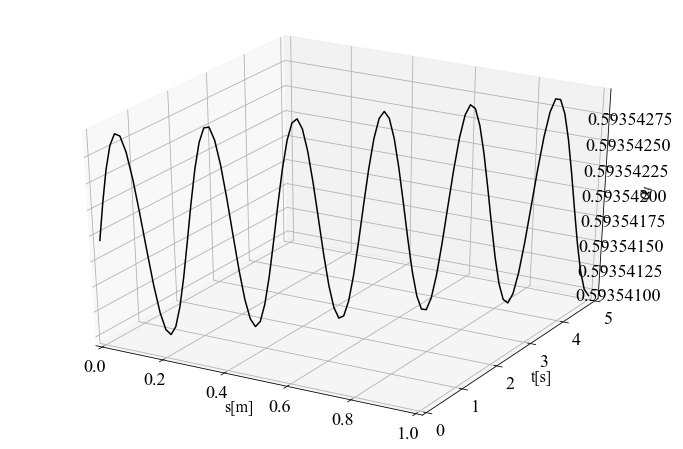

convective1 wave
eigenvector = 7.005e-07


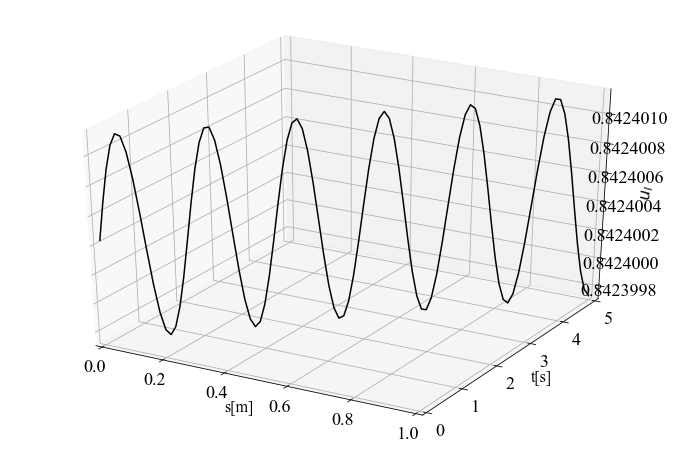

convective2 wave
eigenvector = 2.497e-05


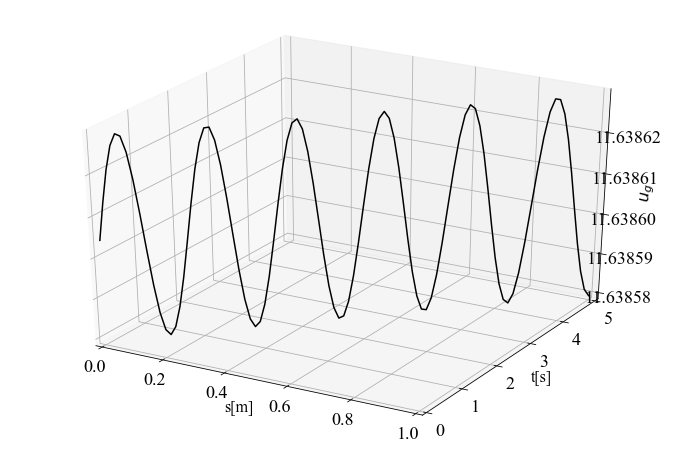

acoustic2 wave
eigenvector = -0.0003619


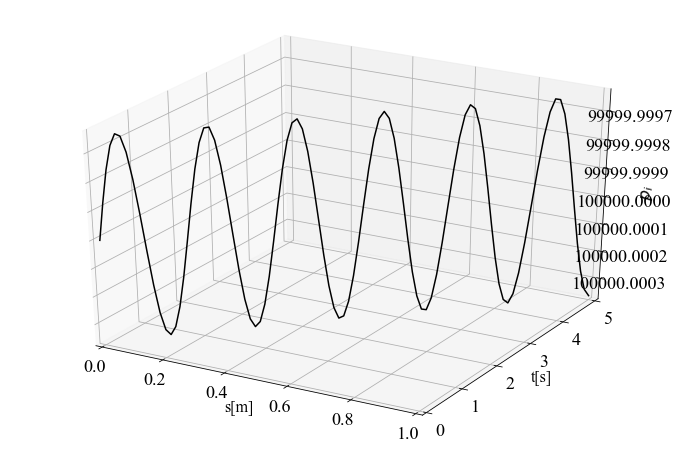

In [18]:
# Exact solution for linear stability

# varstrings = [r'$\alpha_l$', '$u_l$', '$u_g$', '$p_i$']

varstrings = [r'$\alpha_l$', '$u_l$', '$u_g$', '$p_i$']
waves = ["acoustic1", "convective1", "convective2", "acoustic2"]
t_f = 5
k = 2*pi
omegatest = np.array ([-1758.05, 4.27, 8.48, 1931.47]) 
rtest = np.array ([ 1e-6 , 7.005e-7, 2.497e-5, -3.619e-4 ])

alpha1test = 0.5935419531241909
ref = np.array ([alpha1test, j_lcases[1]/alpha1test, j_gcases[1]/alpha1test , 1e5 ]) # deg 
epsplot = 1e-5


i=0
for i in range(4):
    print(waves[i], "wave")
    print("eigenvector =", rtest[i])
    fig   = plt.figure ()
    ax    = fig.gca (projection='3d')

    x     = np.linspace (0, L, 100)
    y     = np.linspace (0, t_f, 100)

    z     = ref[i] + rtest[i]*(np.exp ( 1j*(omegatest[2]*y-k*x))).real      # 1st alternative
    z     = ref[i] + rtest[i]*(np.sin ((omegatest[2]*y-k*x)))               # 2nd alternative

    ax.plot(x, y, z, color = listcolor [0])
    matplotlib.rcParams ['legend.fontsize'] = 10

    plt.rcParams ['figure.figsize'] = [12, 8]
    # leg1  = ax.legend (loc = 'best', frameon = True, fontsize = 14);
    plt.grid (True, which = "both")

    ax.set_xlabel('s[m]', fontsize = 16)
    ax.set_ylabel('t[s]', fontsize = 16)
    ax.set_zlabel(varstrings[i], fontsize = 16)

    ax.ticklabel_format(useOffset=False) #<<<<<<<<<<<<<<<<<<

    sup_lim = ref[i] + rtest[i]
    inf_lim = ref[i] - rtest[i]

    ax.set_xlim ((0, L))
    ax.set_ylim ((0, t_f))
    ax.set_zlim((inf_lim, sup_lim))

    plt.show()
    i+=1


In [19]:
# """
# Two fluid model
# compressible
# differential equation system
# Dispersion analysis
# Higher order regularization
# """
# lambdavector   = np.linspace (minlambda, maxlambda, num = testpointslambda)

# #MAP MATRICES----------------------------------------------------------------------------------------------------
# j_lmapstability = np.zeros ((testpointsbeta, testpointsj_l_cases)) #(rows,columns)

# #print("first j1map=", j1map)

# k = 0
# for beta in betavector:
#     print ("  >>>> β = ", np.rad2deg(beta), "deg")

#     imagmap = np.zeros ((testpointsj_l_cases,testpointslambda)) #(rows,columns)
#     mapwp   = [[ ] for i in range(testpointsj_l_cases)]
    
#     j = 0 #for each element of j2vector
#     for j_g in j_gcases: #iterative process for j2
#         #print (">>>j2 = ", j2)
        
#         i = 0 #for each element of j1vector
#         for j_l in j_lcases: #iterative process for j1
#             var4 = var4_0
#             var1eq = brenth (equilibrium1, lima, limb)

#             # parameters used in boundary conditions
#             var1_0 = var1eq
#             var2_0 = var2 (var1eq)
#             var3_0 = var3 (var1eq)
#             ref = np.array([var1_0, var2_0, var3_0, var4_0])
            
#             # phi=[alpha2, u2, u1, p]ˆT
#             Aeval    = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
#             Beval    = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))            
#             Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))

#             Deval    = np.asarray (Dmat (var1_0, var4_0, Gamma_lvector [k,i], Gamma_gvector [k,i],  nu_lvector [k,i], nu_gvector [k,i]))
#             Deval    = Deval.astype (float)
            
#             #print("Deval=",Deval)
#             Acomplex = Aeval.dot (1j)
#             Bcomplex = Beval.dot (1j)
#             Ccomplex = Ceval.dot (1j)
#             Dcomplex = Deval.dot (1j)

#             #criterion for well-posedness
#             h = 0
#             for wavelength in lambdavector:
#                 #print("> wavelength = ", wavelength)
#                 wavenumber = 2*pi/wavelength

#                 m, _ = eig ( (-wavenumber*Bcomplex - Ceval - pow (wavenumber, 2)*Dcomplex), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 

#                 listreal = []
#                 listimag = []

#                 for l in range (len (m)):
#                     #print("l =", l)
#                     realpart = m [l].real                
#                     imagpart = m [l].imag

#                     listimag.append (imagpart)
#                     listreal.append (realpart)

#                 max_eigval = max (listimag)
#                 min_eigval = min (listimag)

#                 if any ([ v < 0 for v in listimag]) :
#                     condition      = 'unstable'
#                     imagmap [i, h] = max_eigval
#                     mapwp[i]       = condition
#                 else: 
#                     condition      = 'stable'
#                     imagmap [i, h] = min_eigval
#                     mapwp[i]       = condition 
#                 h +=1
#             i += 1 
#         j += 1

#     # Plot of eigenspectra
#     fig, ax = plt.subplots ()
        
#     for ll in range(testpointsj_l_cases):
#         ax.plot (lambdavector/D,
#                  imagmap [ll],
#                  liststyles [ll],
#                  color = listcolor [0],
#                  alpha = 1, label = '$u_{sl}$' + '= ' + str("%.3f" %j_lcases [ll]) + ' $\it{m \; s^{-1}}$' + ' , ' + '$u_{sg}$' + '= ' + str("%.3f" %j_gcases[ll]) + '$\it{m \; s^{-1}}$' + '$ , $' + r'$\beta$' + '= ' + str("%.2f" %betavectordeg [k]) + ' deg')
#         ax.set_xscale ('symlog',
#                        linthreshx = limitlog)
#         ax.set_yscale ('symlog')

#         # minor ticks
# #         ax.xaxis.set_major_locator(MultipleLocator(1))
# #         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# #         ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
        
#         # For the minor ticks, use no labels; default NullFormatter.
#         ax.xaxis.set_minor_locator(MultipleLocator(steplambda))

#         plt.rcParams ['figure.figsize'] = [12, 8]
#         leg1 = ax.legend (loc = 'best', frameon = True, fontsize = 14, shadow = True);
#         plt.grid (True, which = "both")
#         # ax.set_xlabel ('$\lambda/D [-]$', fontsize = 18)
#         # ax.set_ylabel ('Im $[\omega] [1/s]$', fontsize = 18)
#         plt.ylim (( inf_omega, sup_omega))
#         plt.xlim ((inf_lambda, sup_lambda))
        
#         ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
#         ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
#         ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
#         ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

#         ax.set_xlabel(r'$\lambda$/D',
#             fontsize = 18)
#         ax.set_ylabel(r'-Im[$\omega$] $[\it{s^{-1}}]$',
#             fontsize = 18)
        
#         # plt.savefig('09_comp_TFM_stability/fourier_2_'+ str(k) +'.png',
#         #     ppi = 1200,
#         #     transparent = True,
#         #     bbox_inches = 'tight')
    
#     plt.axvline(D, 
#                 inf_omega, 
#                 sup_omega, 
#                 color = listcolor [0])
#     plt.show ()
    
#     k += 1

In [20]:
# end Fourier analysis

In [21]:
# # VALIDATION
# # # Plot Barnea Shoham Taitel (1981) for validation 
# # https://automeris.io/WebPlotDigitizer/tutorial.html
# # horizontal pipe d = 0.051

# x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/vkh_limit_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/intermittent_limit_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/ss_limit_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/alpha05_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')

# fig, ax = plt.subplots()

# ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
# ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
# ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
# ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
# plt.ylim ((minj1, maxj1))
# plt.xlim ((minj2, maxj2))
# plt.grid (True, which = "both")
# leg = ax.legend (loc = 'best',
#                  fontsize = 14);
# plt.rcParams ['figure.figsize'] = [12, 8]

# matplotlib.rc ('xtick',
#                labelsize = 18)     
# matplotlib.rc ('ytick',
#                labelsize = 18)
# leg1  = ax.legend (loc = 'best',
#                    shadow = True, 
#                    frameon = True, 
#                    fontsize = 14);

# ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
# ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
# ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
# ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

# ax.set_xlabel(r'$u_{sg}$ [m/s]', 
#               fontsize = 18, 
#               fontdict = font)
# ax.set_ylabel(r'$u_{sl}$ [m/s]',
#               fontdict = font,
#               fontsize = 18)

# plt.text(0.3, 0.05, 'SS', size = 18) #fontdict = font
# plt.text(3.0, 0.04, 'SW', size = 18)
# plt.text(0.9, 0.5, 'I', size = 18)
# plt.text(0.2, 3, 'DB', size = 18)
# plt.text(13, 0.2, 'A', size = 18)


# plt.savefig('barnea1981-1983maps_inclined/barnea1981_horizontal/barnea_horizontal.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')
# plt.show

In [22]:
# # Plot Barnea Shoham Taitel (1981) for validation 
# # https://automeris.io/WebPlotDigitizer/tutorial.html
# # 0.25 deg inclined pipe d = 0.051

# x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1983_025upward/intermittent_limit_025deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1983_025upward/ss_limit_025deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1983_025upward/alpha05_025deg.csv',
#                  unpack = True, 
#                  delimiter = ',')

# fig, ax = plt.subplots()

# ax.loglog(x1,y1, 'k--', label = 'Intermitent limit')
# ax.loglog(x2,y2, 'k-', label = 'Stratified limit')
# ax.loglog(x3,y3, 'k-.', label = r'$\alpha_l$ = 0.5')
    
# plt.ylim ((minj1, maxj1))
# plt.xlim ((minj2, maxj2))
# plt.grid (True, which = "both")
# leg = ax.legend (loc = 'best',
#                  fontsize = 14);
# plt.rcParams ['figure.figsize'] = [12, 8]

# matplotlib.rc ('xtick',
#                labelsize = 18)     
# matplotlib.rc ('ytick',
#                labelsize = 18)
# leg1  = ax.legend (loc = 'best',
#                    shadow = True, 
#                    frameon = True, 
#                    fontsize = 14);

# ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
# ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
# ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
# ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

# ax.set_xlabel(r'$u_{sg}$ [m/s]', 
#               fontsize = 18, 
#               fontdict = font)
# ax.set_ylabel(r'$u_{sl}$ [m/s]',
#               fontdict = font,
#               fontsize = 18)

# plt.text(10.0, 0.04, 'S', size = 18)
# plt.text(0.9, 0.5, 'I', size = 18)
# plt.text(0.12, 3.9, 'DB', size = 18)
# plt.text(13, 0.2, 'A', size = 18)


# plt.savefig('barnea1981-1983maps_inclined/barnea1983_025upward/barnea1983_025upward.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')
# plt.show

In [23]:
# # Plot Barnea Shoham Taitel (1981) for validation 
# # https://automeris.io/WebPlotDigitizer/tutorial.html
# # -5deg inclined pipe d = 0.051

# x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/vkh_limit_-5deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/intermittent_limit_-5deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/ss_limit_-5deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_5downward/alpha05_-5deg.csv',
#                  unpack = True, 
#                  delimiter = ',')

# fig, ax = plt.subplots()

# ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
# ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
# ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
# ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
# plt.ylim ((minj1, maxj1))
# plt.xlim ((minj2, maxj2))
# plt.grid (True, which = "both")
# leg = ax.legend (loc = 'best',
#                  fontsize = 14);
# plt.rcParams ['figure.figsize'] = [12, 8]

# matplotlib.rc ('xtick',
#                labelsize = 18)     
# matplotlib.rc ('ytick',
#                labelsize = 18)
# leg1  = ax.legend (loc = 'best',
#                    shadow = True, 
#                    frameon = True, 
#                    fontsize = 14);

# ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
# ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
# ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
# ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

# ax.set_xlabel(r'$u_{sg}$ [m/s]', 
#               fontsize = 18, 
#               fontdict = font)
# ax.set_ylabel(r'$u_{sl}$ [m/s]',
#               fontdict = font,
#               fontsize = 18)

# plt.text(0.2, 0.015, 'SS', size = 18) #fontdict = font
# plt.text(1.0, 0.3, 'SW', size = 18)
# plt.text(10, 2, 'I', size = 18)
# plt.text(0.2, 3, 'DB', size = 18)
# plt.text(13, 0.2, 'A', size = 18)


# plt.savefig('barnea1981-1983maps_inclined/barnea1981_5downward/barnea1981_5downward.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')
# plt.show

In [24]:
# # Plot Barnea Shoham Taitel (1981) for validation 
# # https://automeris.io/WebPlotDigitizer/tutorial.html
# # horizontal pipe d = 0.051

# x1,y1 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/vkh_limit_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x2,y2 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/intermittent_limit_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x3,y3 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/ss_limit_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')
# x4,y4 = np.loadtxt('barnea1981-1983maps_inclined/barnea1981_horizontal/alpha05_0deg.csv',
#                  unpack = True, 
#                  delimiter = ',')

# fig, ax = plt.subplots()

# ax.loglog(x1,y1, 'k-', label = 'Stratified limit')
# ax.loglog(x2,y2, 'k--', label = 'Intermitent limit')
# ax.loglog(x3,y3, 'k.', label = 'Stratified smooth limit')
# ax.loglog(x4,y4, 'k-.', label = r'$\alpha_l$ = 0.5')
    
# plt.ylim ((minj1, maxj1))
# plt.xlim ((minj2, maxj2))
# plt.grid (True, which = "both")
# leg = ax.legend (loc = 'best',
#                  fontsize = 14);
# plt.rcParams ['figure.figsize'] = [12, 8]

# matplotlib.rc ('xtick',
#                labelsize = 18)     
# matplotlib.rc ('ytick',
#                labelsize = 18)
# leg1  = ax.legend (loc = 'best',
#                    shadow = True, 
#                    frameon = True, 
#                    fontsize = 14);

# ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
# ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
# ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
# ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

# ax.set_xlabel(r'$u_{sg}$ [m/s]', 
#               fontsize = 18, 
#               fontdict = font)
# ax.set_ylabel(r'$u_{sl}$ [m/s]',
#               fontdict = font,
#               fontsize = 18)

# plt.text(0.3, 0.05, 'SS', size = 18) #fontdict = font
# plt.text(3.0, 0.04, 'SW', size = 18)
# plt.text(0.9, 0.5, 'I', size = 18)
# plt.text(0.2, 3, 'DB', size = 18)
# plt.text(13, 0.2, 'A', size = 18)


# plt.savefig('barnea1981-1983maps_inclined/barnea1981_horizontal/barnea_horizontal.png',
#             ppi = 1200,
#             transparent = True,
#             bbox_inches = 'tight')
# plt.show

In [25]:
# END